<a href="https://colab.research.google.com/github/dineshuthayakumar/MitraAIBootCamp/blob/main/Home_Prices_Prediction_100_accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import userdata
from os import environ

environ["KAGGLE_KEY"]      = userdata.get('KAGGLE_KEY')
environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

! pip -q install kaggle
! kaggle competitions download -c house-prices-advanced-regression-techniques
! unzip /content/house-prices-advanced-regression-techniques.zip

house-prices-advanced-regression-techniques.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  /content/house-prices-advanced-regression-techniques.zip
replace data_description.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import pandas as pd
df = pd.read_csv("train.csv")
df

In [ ]:
from sklearn.preprocessing import LabelEncoder
for column in df.columns:
    if not pd.api.types.is_numeric_dtype(df[column].dtype):
      df[column] = LabelEncoder().fit_transform(df[column])

    else:
      if df[column].isnull().any():
        df[column].fillna(df[column].median(),inplace=True)

In [ ]:
y = df["SalePrice"]
X = df.drop("SalePrice",axis="columns")

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=3)

In [ ]:
df

In [ ]:
X_test.info()

In [ ]:
import numpy as np

def print_accuracy(model):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  model_name = model.__class__.__name__

  from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
  print("Accuracy for model: ", model_name)
  print("R Squared : ", r2_score(y_test, y_pred))
  print("Mean Absolute Error :", round(mean_absolute_error(y_test,y_pred)))
  print("RMSE:",round(np.sqrt(mean_squared_error(y_test, y_pred))))

In [ ]:
def run_popular_regression_models():
  from sklearn.ensemble import RandomForestRegressor
  model = RandomForestRegressor(n_estimators = 9, max_depth = 6, random_state = 0, )
  print_accuracy(model)

  from sklearn.linear_model import ElasticNet
  model = ElasticNet()
  print_accuracy(model)

  from xgboost.sklearn import XGBRegressor
  model = XGBRegressor(max_depth=7, random_state = 0,learning_rate=0.2)
  print_accuracy(model)

  from sklearn.ensemble import GradientBoostingRegressor
  model = GradientBoostingRegressor()
  print_accuracy(model)

  from sklearn.linear_model import BayesianRidge
  model = BayesianRidge()
  print_accuracy(model)

  from sklearn.linear_model import LinearRegression
  model = LinearRegression()
  print_accuracy(model)

  from sklearn.neural_network import MLPRegressor
  model = MLPRegressor(random_state=0,max_iter=1000)
  print_accuracy(model)

run_popular_regression_models()

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

top_features = df.corr()[['SalePrice']].sort_values(by=['SalePrice'],ascending=False).head(30)
plt.figure(figsize=(5,10))
sns.heatmap(top_features, cmap='rainbow',annot=True,annot_kws={"size": 16}, vmin=-1)

In [ ]:
#Let's load the data again
df = pd.read_csv("train.csv")

In [ ]:
df['TotalSquareFeet'] = (df['BsmtFinSF1'] + df['BsmtFinSF2'] + df['1stFlrSF'] + df['2ndFlrSF'] + df['TotalBsmtSF'])

df['TotalBath'] = (df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath']))

df['TotalPorchArea'] = (df['OpenPorchSF'] + df['3SsnPorch'] + df['EnclosedPorch'] + df['ScreenPorch'] + df['WoodDeckSF'])

df['SqFtPerRoom'] = df['GrLivArea'] / (df['TotRmsAbvGrd'] + df['FullBath'] + df['HalfBath'] + df['KitchenAbvGr'])

In [ ]:
y = df["SalePrice"]
X = df.drop("SalePrice",axis="columns")

##
X = pd.get_dummies(df,drop_first=True, dtype=int)
for col in X.columns:
  if pd.api.types.is_numeric_dtype(X[col].dtype):
    if X[col].isnull().any():
      X[col].fillna(X[col].median(),inplace=True)

X.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,1,0,0,0,1,0


<Axes: >

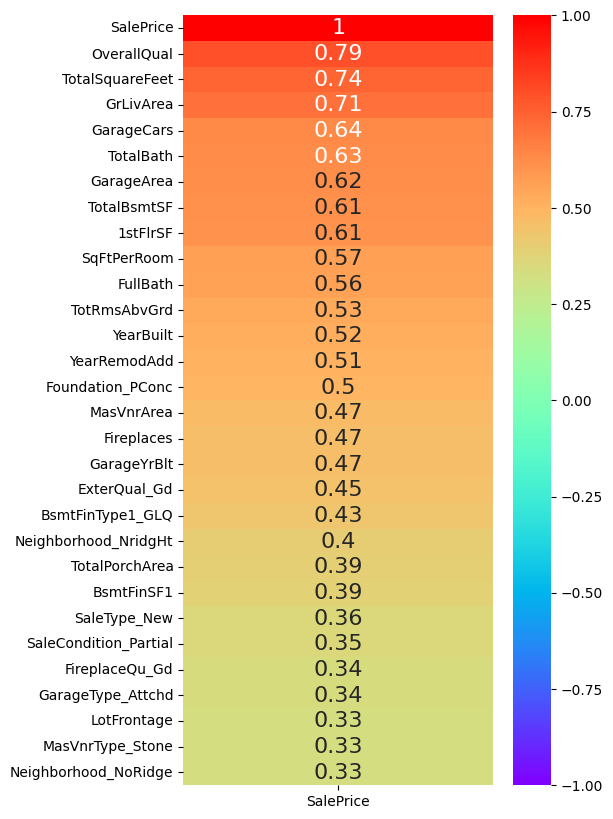

In [ ]:
top_features = X.corr()[['SalePrice']].sort_values(by=['SalePrice'],ascending=False).head(30)
plt.figure(figsize=(5,10))
sns.heatmap(top_features, cmap='rainbow',annot=True,annot_kws={"size": 16}, vmin=-1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=3)

In [ ]:
run_popular_regression_models()

Accuracy for model:  RandomForestRegressor
R Squared :  0.9996818653121553
Mean Absolute Error : 759
RMSE: 1253
Accuracy for model:  ElasticNet
R Squared :  0.9999999998549429
Mean Absolute Error : 1
RMSE: 1
Accuracy for model:  XGBRegressor
R Squared :  0.9935542345046997
Mean Absolute Error : 949
RMSE: 5642
Accuracy for model:  GradientBoostingRegressor
R Squared :  0.9998407915347217
Mean Absolute Error : 628
RMSE: 887
Accuracy for model:  BayesianRidge
R Squared :  -576890549365.3712
Mean Absolute Error : 6942187654
RMSE: 53371872828
Accuracy for model:  LinearRegression
R Squared :  1.0
Mean Absolute Error : 0
RMSE: 0
Accuracy for model:  MLPRegressor
R Squared :  0.9999937039708456
Mean Absolute Error : 135
RMSE: 176


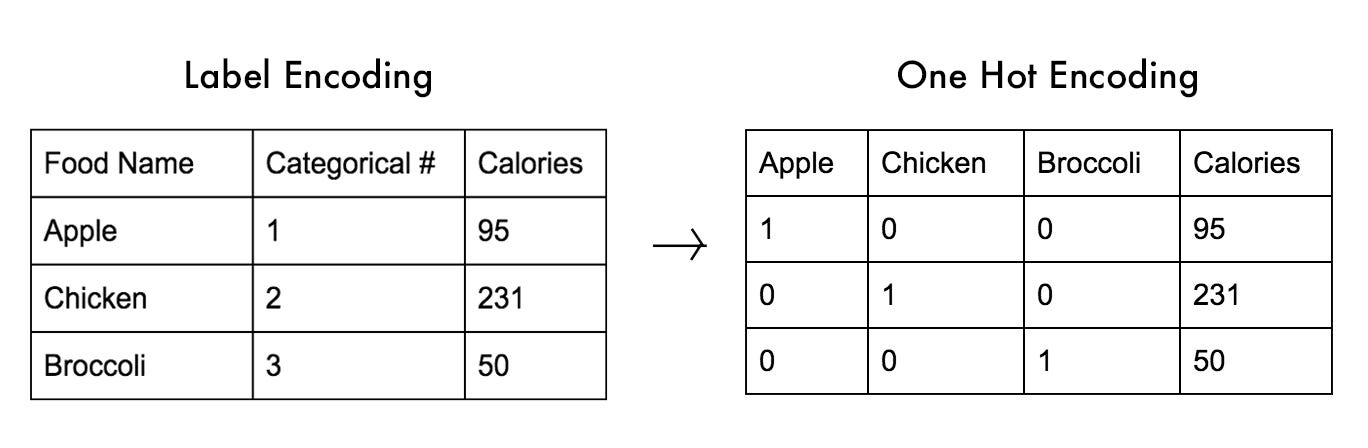